In [5]:
#import libraries
#import numpy and pandas
import numpy as np
import pandas as pd
#import matplotlib
import matplotlib.pyplot as plt
#use the plt inside the notebook
%matplotlib inline
#T1 level models
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier as MLP

In [6]:
#pkl file directory
pkl_dir = './dataset/'
pkl_name_x0 = 'trainX0.pkl'
pkl_name_y = 'trainY.pkl'
#load the data
data_X = pd.read_pickle(pkl_dir+pkl_name_x0)
data_Y = pd.read_pickle(pkl_dir+pkl_name_y)

In [7]:
#pkl file directory
pkl_dir = './dataset/'
pkl_name_xt = 'testX0.pkl'
pkl_name_yt = 'testY.pkl'
#load the data
data_Xt = pd.read_pickle(pkl_dir+pkl_name_xt)
data_Yt = pd.read_pickle(pkl_dir+pkl_name_yt)

In [8]:
#organize the data
#distribute the label into 2 group
x_train = []
y_train = []
x_test  = []
y_test  = []
for i in range(3000):
    #binary label 0 stand for no tumor and 1 stands for have tumor
    if data_Y.tumor_type[i] == 'no':
        y_train.append(0)
    else:
        y_train.append(1)
    #list like img set
    #x_train.append(data_X[i].tolist())
for i in range(200):
    #binary label 0 stand for no tumor and 1 stands for have tumor
    if data_Yt.tumor_type[i] == 'no':
        y_test.append(0)
    else:
        y_test.append(1)
    #list like img set
    #x_test.append(data_Xt[i].tolist())

In [14]:
Xtrain = data_X.T
Ytrain = np.array(y_train)
Xtest = data_Xt.T
Ytest = np.array(y_test)

In [15]:
Xtrain.shape

(3000, 262144)

In [11]:
Ytrain.shape

(3000,)

In [16]:
Xtest.shape

(200, 262144)

In [13]:
Ytest.shape

(200,)

In [34]:
model0 = RFC(80, class_weight ='balanced',max_depth= None, min_samples_split= 2)
model0.fit(Xtrain,Ytrain)
Ypredict = model0.predict(Xtest)

acc = metrics.accuracy_score(Ytest,Ypredict)
prec = metrics.precision_score(Ytest,Ypredict)
recall = metrics.recall_score(Ytest,Ypredict)
f1 = metrics.f1_score(Ytest,Ypredict)

Yscore = model0.predict_proba(Xtest)[:,1]
roc = roc_curve(Ytest,Yscore)

In [36]:
acc,prec,recall,f1

(0.975, 0.9759036144578314, 0.9938650306748467, 0.9848024316109423)

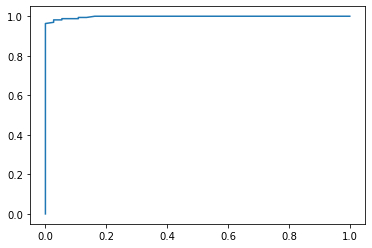

In [40]:
fpr,tpr,thresolds = roc
plt.plot(fpr,tpr)
plt.savefig('./figs/rf.svg')

In [17]:
model1 = SVC(kernel='rbf',class_weight='balanced',probability = True,gamma=0.0005,C=0.8)
model1.fit(Xtrain,Ytrain)
Ypredict = model1.predict(Xtest)

acc = metrics.accuracy_score(Ytest,Ypredict)
prec = metrics.precision_score(Ytest,Ypredict)
recall = metrics.recall_score(Ytest,Ypredict)
f1 = metrics.f1_score(Ytest,Ypredict)

Yscore = model1.predict_proba(Xtest)[:,1]
roc = roc_curve(Ytest,Yscore)

In [18]:
acc,prec,recall,f1

(0.955, 0.9695121951219512, 0.9754601226993865, 0.9724770642201835)

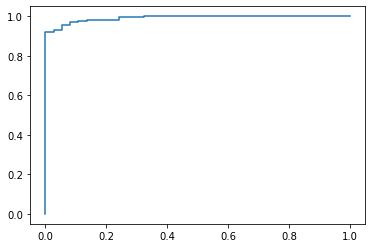

In [19]:
fpr,tpr,thresolds = roc
plt.plot(fpr,tpr)
plt.savefig('./figs/svm.svg')

In [21]:
model2 = MLP(hidden_layer_sizes = (560,), activation = 'relu',solver = 'adam',learning_rate_init=0.0005,alpha=0.0001)
model2.fit(Xtrain,Ytrain)
Ypredict = model2.predict(Xtest)

acc = metrics.accuracy_score(Ytest,Ypredict)
prec = metrics.precision_score(Ytest,Ypredict)
recall = metrics.recall_score(Ytest,Ypredict)
f1 = metrics.f1_score(Ytest,Ypredict)

Yscore = model2.predict_proba(Xtest)[:,1]
roc = roc_curve(Ytest,Yscore)

In [22]:
acc,prec,recall,f1

(0.86, 0.9787234042553191, 0.8466257668711656, 0.9078947368421053)

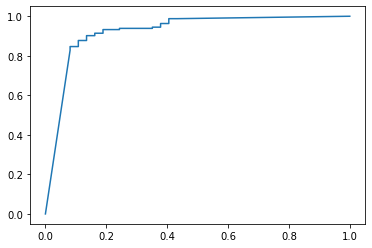

In [23]:
fpr,tpr,thresolds = roc
plt.plot(fpr,tpr)
plt.savefig('./figs/mlp.svg')